## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [4]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 

xc: 37.43600076296877 yc: 38.68874999999999 minimum index : [572,629] minimum : 1.382104687499975I0 = 629
X12[I0] = [38.3959,38.01]
xcore = [37.6959,39.01]


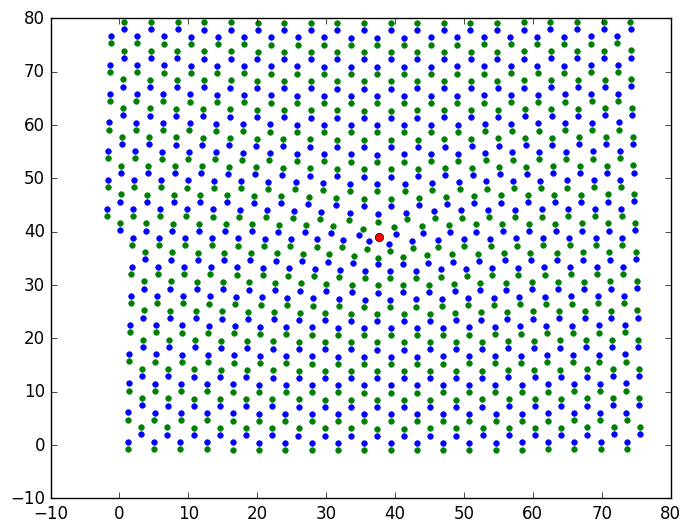

 b 3.839589821842953

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8c52e8c550>

In [10]:
# isotropic elasticity solution for an silicon edge dislocation 110 direction and 001 slipe plane 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard_110_new.fcc_edge_geom("Si", 8.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1,eos_correction=true)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=8)
plot(x[I1], y[I1], "g.", markersize=8)
plot([xcore[1]], [xcore[2]], "ro")

xc: 198.69877328037302 yc: 198.87374999999997 minimum index : [15242,15543] minimum : 1.3821046874996317I0 = 15543
X12[I0] = [199.659,199.553]
xcore = [198.959,200.553]


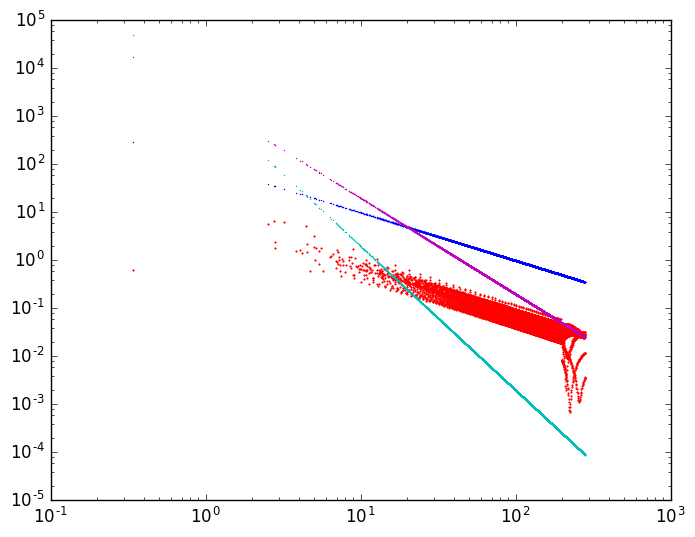

 b 3.839589821842953

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8c5260c290>
 PyObject <matplotlib.lines.Line2D object at 0x7f8c525d8c90>
 PyObject <matplotlib.lines.Line2D object at 0x7f8c525e6290>

In [14]:
## anisotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard_110_new.fcc_edge_geom("Si", 50.1, truncate=false, cle=:anisotropic, calc = calc,zDir=1,eos_correction=true)
X = positions(at) |> mat
set_calculator!(at, calc)
xcore = [xcore[1], xcore[2],0] #append a zero to xcore
r = [norm(x - xcore) for x in positions(at)]
f = [norm(g) for g in forces(at)]
loglog(r,f, "r.", markersize=2)
loglog(r,1e2 * r.^(-1), "b.", r,2e3 * r.^(-3), "c.", r,2e3 * r.^(-2), "m.",markersize=1)

In [35]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
atu = set_pbc!(bulk("Si", cubic=true) * 2, true)
set_calculator!(atu, JuLIP.Potentials.StillingerWeber())
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = round(El.voigt_moduli(atu), 3)
Cvoigt

6×6 Array{Float64,2}:
  0.946  0.478   0.478  -0.0    -0.0    -0.0  
  0.478  0.946   0.478   0.0     0.0     0.0  
  0.478  0.478   0.946   0.0     0.0    -0.0  
  0.0    0.0     0.0     0.685   0.0    -0.0  
 -0.0    0.0     0.0     0.0     0.685  -0.0  
 -0.0    0.0    -0.0    -0.0    -0.0     0.685

In [28]:
# check how far we are from anisotropy: pretty far actually 
println((Cvoigt[1,1] - Cvoigt[1,2]) / 2)
println("for isotropy, this number should match Cvoigt[6,6] = ", Cvoigt[6,6])

1.6260000000000001
for isotropy, this number should match Cvoigt[6,6] = 4.212


In [8]:
reload("MaterialsScienceTools")
Cv = copy(Cvoigt)
Cv[2,2] = Cv[3,3] = Cv[1,1]
Cv[1,3] = Cv[2,3] = Cv[1,2]
Cv[4,4] = Cv[5,5] = Cv[6,6] = (Cv[1,1] - Cv[1,2])/2

1.6260000000000001

xc: 198.69877328037285 yc: 198.87374999999997 minimum index : [30482,30486,31083,31087] minimum : 1.382104687499959I0 = 31087
X12[I0] = [199.659,199.553]
xcore = [198.959,200.553]


 b 3.839589821842953

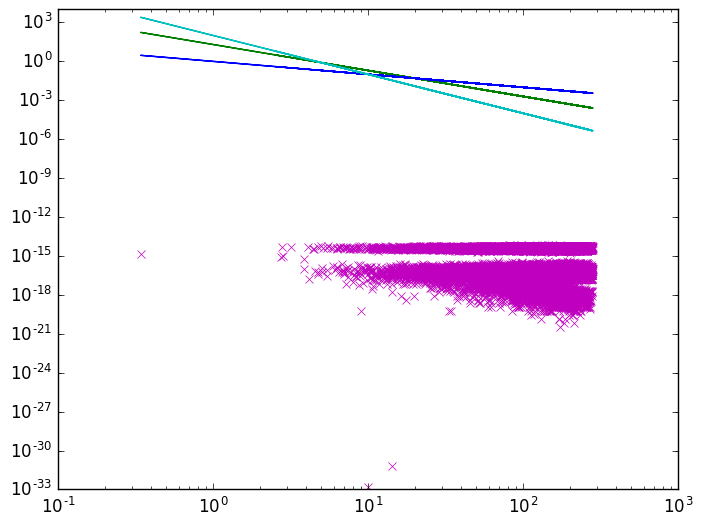

count : 61569

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8c517852d0>

In [23]:
# anisotropic elasticity solution for an FCC edge dislocation
reload("MaterialsScienceTools")
calc = StillingerWeber()
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard_110_new.fcc_edge_geom("Si", 50.1, truncate=false, cle=:anisotropic, calc = calc,zDir=2,eos_correction=true)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
#plot(x[I0], y[I0], "b.", markersize=10)
#plot(x[I1], y[I1], "g.", markersize=10)
#plot([xcore[1]], [xcore[2]], "ro")
X = positions(at) |> mat
xP, yP, zP = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
set_calculator!(at, calc)
xcore = [xcore[1],xcore[2],0] #append a zero to xcore
F = forces(at)
X = positions(at)
r = [norm(x-xcore) for x in X]
f = [norm(g) for g in F]
nu = length(f)
pip = zeros(nu,1)
inner = ones(nu)
inner_force = ones(nu)
count = 1
for i=1:nu
    pip[i,1] = norm([xP[i];yP[i]]-[xcore[1]; xcore[2]])
    #if (-6.00 > yP[i]-xcore[2] || 6.00 < yP[i]-xcore[2] || xP[i] > 0) && norm([xP[i];yP[i]]-[xcore[1]; xcore[2]]) < maximum(r)/2
    if norm([xP[i];yP[i]]-[xcore[1]; xcore[2]]) < maximum(r)
    #print(" here ")
        #print(xP[i]-xcore[1])
        inner[count] =r[i]
        inner_force[count]= norm(F[i][3])#f[i]
        #print(" force :")
        #print(F[i])
        count = count +1
    end
end
print("count : ")
print(count)
ITEST = find(log(pip[:,1]) .> 1.0)
v = x[ITEST]
u = y[ITEST]
fTest = [norm(F[i]) for i in ITEST]
#plot(x[ITEST], y[ITEST], "b.", markersize=10)
y = 20r.^(-2)  #plot line of slope two
z = r.^(-1)  #plot line of slope one
w = 100r.^(-3)  #plot line of slope three
#loglog(pip,f, "mx")
loglog(inner,inner_force, "mx")
#loglog(r,f, "ro")
loglog(r,y, "g-")
loglog(r,z, "b-")
loglog(r,w, "c-")